# Introduction to Data Science – Homework 4
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 10, 2023, 11:59pm.

In this homework, you will study Salt Lake City air quality data and complete an A/B test comparing two ads. 

## Your Data
Fill out the following information: 

*First Name:*   Arham
*Last Name:*   Irshad
*E-mail:*   u1298267@umail.utah.edu
*UID:*  u1298267


In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: SLC Air Quality Index 

In this problem, you'll study the Air Quality in Salt Lake City. 

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://airnow.gov/index.cfm?action=aqibasics.aqi) and the 
[AirNow](https://airnow.gov/index.cfm?action=topics.about_airnow) system. 


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
+ Pollutant = PM2.5
+ Year = 2022
+ City = Salt Lake City, UT
+ Monitor Site = All Sites



### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

+ The dates are not sorted. 
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,3,4,5) and different sites.

In [2]:
# your code goes here
x = pd.read_csv("ad_viz_plotval_data.csv")
x

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2022,AQS,490352005,1,4.3,ug/m3 LC,18,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2022,AQS,490352005,1,8.5,ug/m3 LC,35,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2022,AQS,490352005,1,16.5,ug/m3 LC,60,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2022,AQS,490352005,1,5.0,ug/m3 LC,21,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2022,AQS,490352005,1,5.2,ug/m3 LC,22,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6503,12/27/2022,AQS,490450004,3,1.4,ug/m3 LC,6,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600532,-112.353414
6504,12/28/2022,AQS,490450004,3,0.2,ug/m3 LC,1,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600532,-112.353414
6505,12/29/2022,AQS,490450004,3,0.2,ug/m3 LC,1,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600532,-112.353414
6506,12/30/2022,AQS,490450004,3,0.5,ug/m3 LC,2,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600532,-112.353414


### Task 1.3. Plot the data

1. The data contains multiple PM2.5 concentration and AQI entries for the same date measured at different sites and with different sensors (POCS). Plot average PM2.5 and AQI values with respect to date in a single figure. Anyone analysing the graph should be able to answer, what is the average PM 2.5 concentration or the AQI value on a particular date. 

2. Plot the average PM 2.5 concentration vs Date for two different sites (site ids - 490352005 and 490353016). Note in this case the average is just taken over POCs. Plot for both the sites should be in a single figure.
*Hint*: use the pandas groupby function


365


<function matplotlib.pyplot.show(*args, **kw)>

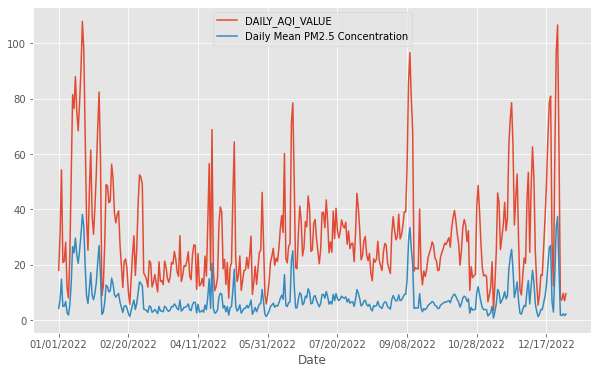

In [3]:
# your code goes here
#part1
#pre sorting by dates so for easier access
x.sort_values(by=['Date'])
#groupin gby date to take mean more easily
a = x.groupby("Date")

pm_vals = a.mean()["Daily Mean PM2.5 Concentration"]
Aqi = a.mean()["DAILY_AQI_VALUE"]
#simply getting rid of duplicates dates since I only need just the dates 
date = x["Date"].drop_duplicates()
Aqi.plot()
pm_vals.plot()
plt.legend()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

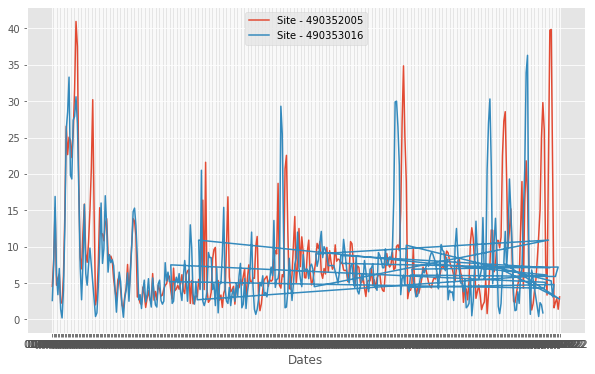

In [16]:
#part2
'''
vals1 = []
vals2 = []
dates1 = []
dates2 = []
vals1.append(pm_vals[(x[x["Site ID"]==490352005].index.values)])
vals2.append(pm_vals[(x[x["Site ID"]==490353016].index.values)])
dates1.append(date[(x[x["Site ID"]==490352005].index.values)])
dates2.append(date[(x[x["Site ID"]==490353016].index.values)])
print(len(dates1))

plt.scatter(dates1,vals1)
plt.scatter(dates2,vals2)
plt.show

df = x[(x["Site ID"] == 490352005) | (x["Site ID"] == 490353016)]
df1 = df.groupby("Date")
pm_vals_df = df1.mean()["Daily Mean PM2.5 Concentration"]
Aqi_df = df1.mean()["DAILY_AQI_VALUE"]


Aqi_df.plot()
pm_vals_df.plot()
plt.show
'''
#Getting the group of site IDs i need
df = x.groupby("Site ID")
df1 = df.get_group(490352005).groupby("Date")
df2 = df.get_group(490353016).groupby("Date")
#getting associated pm vals
pm_vals_df = df1.mean()["Daily Mean PM2.5 Concentration"]
pm_vals_df2 = df2.mean()["Daily Mean PM2.5 Concentration"]
date1 = df.get_group(490352005)["Date"].drop_duplicates()
date2 = df.get_group(490353016)["Date"].drop_duplicates()
#plotting
plt.plot(date1,pm_vals_df)
plt.plot(date2,pm_vals_df2)
plt.legend(['Site - 490352005','Site - 490353016'])
plt.xlabel("Dates")
plt.show


### Task 1.4. Plot a moving average

Make a plot with both the daily AQI value and a moving average for the daily AQI value. Use the daily AQI value that is averaged over the sites and POC. Experiment with different time windows to find one that is reasonable.

*Hint:* Use the rolling() function as in Lecture 8. 

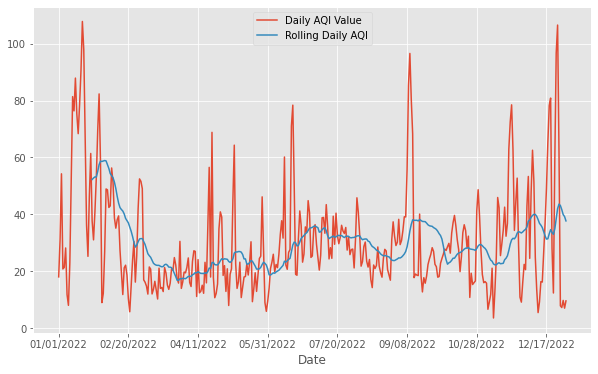

In [35]:
# your code goes here

Aqi = a.mean()["DAILY_AQI_VALUE"]
#calculating rolling AQI
rol = Aqi.rolling(25).mean()
Aqi.plot()

rol.plot()
plt.legend(['Daily AQI Value','Rolling Daily AQI'])

## Part 2: A/B testing

First read the WIRED article on A/B testing [here](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new logo. The art department develops two logos: ‘Logo A’ and ‘Logo B’, shown below. 
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)
Your job is to figure out which logo is better. 


You decide to conduct the following experiment. You use Google ads to buy 6000 advertisements. In $N_A=3000$ of the ads (randomly chosen), you use Logo A and in the other $N_B=3000$ ads, you use Logo B. Then you see which logo attracts more clicks.

It turns out that $n_A=800$ Logo A viewers click on the ad while $n_B=1000$ Logo B viewers click on the ad. Obviously Logo B did better in this test, but is the difference *significant* enough to say that Logo B is better? Or, perhaps, Logo B just got lucky in this test? 

The goal of this exercise will be to conduct a two-proportion z-test to determine if Logo B is better. The steps will be similar to those from Lecture 7 used for the 1954 Salk polio-vaccine experiment.

### Task 2.1.  Formulate null hypothesis 

Let $p_A = n_A/N_A$ be the proportion of clicks on Logo A and similiarly $p_B$ be the proportion of clicks on Logo B. In terms of $p_A$ and $p_B$, clearly state the null and alternative hypothesis. 

**Your Solution:** 
Null hypthesis is that there is no difference between the two loges i.e pa = pb. Alternative hypothesis is that there is a difference i.e pa!=pb

### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, we know from lecture that the test statistic, called the *two-proportion z-value*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 


Find the two-proportion z-value.

In [36]:
# your code goes here
#Using provided formula
Na = Nb= 3000
pa = 800/Na
pb = 1000/Nb
p = (pa*Na/(Na+Nb))+(pb*Nb/(Na+Nb))
q = 1-p
z = (pa -pb)/math.sqrt(p*q*((1/Na)+(1/Nb)))
z

-5.6343616981901095

### Task 2.3. Complete the two proportion z-test 

Find the $p$-value for the hypothesis test. Do this first using the normal cdf function and then check your answer by running a two proportions z-test in python with the proportions_ztest function. 

In [ ]:
# your code goes here
#getting p val through cdf function
print(norm.cdf(z))
counts = [800, 1000]
sample_sizes = [3000, 3000]
#using the built in function to compare
z, pval = proportions_ztest(counts, sample_sizes,alternative='smaller')
print(pval)

### Task 2.4. Interpretation

Interpret the $p$-value in this example and  state the result of the hypothesis test at the $\alpha=10\%$ and $\alpha=5\%$ significance levels. 


**Your Interpretation:** The result at both sginificane levels shows that we reject the alternative hypothesis since they're both the p value is was smaller than the significance level. I would interpret the P value to show how likely it is that the results are not just by chance.